In [2]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, arctan2, exp
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib ipympl

<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Quadrature Signals 

* **AIS2201 - Signal Processing**
* **Week 34**
* **Lecturer: Kai Erik Hoff**

# Topics

* Complex exponentials (aka. quadrature signals)
* Negative frequency
* Two-sided frequency spectrum

# Complex frequency mixing

* As we have seen, the results from mixing with both a sine wave and cosine wave must be combined to gain an accurate measure of a frequency component's magnitude $A$ and phase $\phi$

* Combining these in the complex plane leads to..

$$\begin{align}
\boldsymbol{a}_k &= \frac{1}{T}\int_0^T x(t)\cdot \cos\left(2\pi \cdot \frac{k}{T} \cdot t\right) dt  - \frac{j}{T}\int_0^T\sin\left(2\pi \cdot \frac{k}{T}  \cdot t\right) dt \\
&=\frac{1}{T}\int_0^T x(t)\cdot \left( \cos\left(2\pi \cdot \frac{k}{T} \cdot t \right) - j \sin\left(2\pi \cdot \frac{k}{T}  \cdot t\right) \right) dt\\
&=\frac{1}{T}\int_0^T x(t)\cdot e^{-j 2\pi \frac{k}{T}t} dt\end{align}$$

* Takeaway: the signal is mixed with a *complex exponential*

## Komplex exponentials (quadrature signals)
## $$e^{j\omega t} = \cos(\omega t) + j\sin(\omega t)$$
    
    
    
<div style="width: 100%;">
    <img src="Figurer/03_Sinussignal/Fig18_compRot.jpg" align="right" width="40%" />
    <div style="width: 60%">
    <ul>
        <br>
      <li>Visualized as a rotating phasor</li>
      <ul><li>Constant lenght</li>
          <li>Angle $\theta$ varies as a function of time $t$ </li>
          $$\theta = \omega\cdot t$$ 
          <li>Angular frequency $\omega$ determines <i>rotation speed</i>.
        </ul>
    </ul>  
    </div>
</div> 

## Negative frequency

* A rotating phasor has a *direction* as well as a *rotation frequency*
    * Frequencies can be *negative*
    * Cunter-clockwise rotation = *positive* frequency
    * Clockwise rotation = *negative* frequency
<!--
* Matematisk frekensanalyse bryter opp signaler i komplekse eksponentialer.
* Frekvensen til komplekse eksponentialer avgjør hastigheten på den komplekse vektorenes rotasjon.
    - Denne rotasjonen har en *retning*.
    - Vektorer som roterer *mot* klokken har *positiv* frekvens.
    - Vektorer som roterer *med* klokken har *negativ* frekvens.
* I Signalbehandling har frekvens altså en *retning*. Og negative frekvenser er dermed, rent matematisk, noe som eksisterer.
* Et sinussignal med frekvens $100Hz$, kan dermed sies å ha frekvensinnhold to frekvenser: $f = \pm 100Hz$.
-->

# Complex functions in Python

* In python, `j` is used as a complex unit vector.
    * Dependent on a mumerical magnitude as prefix. (eks.: `z = 1j`) 
* The `numpy` module has a number of functions for complex values: `abs()`, `angle()`, `real()` og `imag()`.
* Other useful trigonometric functions in `numpy`: `cos()`, `sin()`, `hypot()`, `arctan2()` og `exp()`.

In [30]:
z = 1 + 2j
length = np.abs(z)
angle = np.angle(z)
length, np.rad2deg(angle)

(2.23606797749979, 63.43494882292201)

## Sinusoids and coplex exponentials

<img src="Figurer/03_Sinussignal/Fig18_rePhasor.gif" align="right" width="20%" />

<br>
<br>

* A cosine function is the real part of a complex exponential.
$$\cos(\omega t) = \mathfrak{R}e\left(e^{j\omega t}\right)$$
* A sine function is the imaginary part of a complex exponential.
$$\sin(\omega t) = \mathfrak{I}m\left(e^{j\omega t}\right)$$



## Complex exponentials visualized

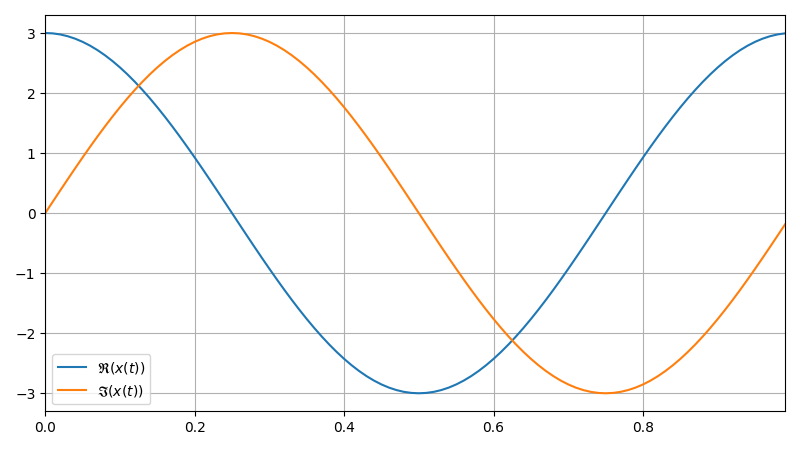

In [3]:
A = 3
f = 2
T = 1
fs = 100
t = np.linspace(0, T, T*fs, endpoint=False)
x = A*exp(2j*pi*t)
plt.close(10);plt.figure(10)
plt.plot(t, np.real(x), label=r"$\mathfrak{R}(x(t))$")
plt.plot(t, np.imag(x), label=r"$\mathfrak{I}(x(t))$")
plt.legend()

## Sinusoids as a sum of complex exponentials

<div style="width: 90%;">
    <img src="Figurer/03_Sinussignal/Fig19_phasorSum.gif" align="right" width="25%" />
    <div style="width: 60%">
    <ul>
      <br>
      <li>A sinusoid can be decomposed into a sum of rotating phasors:</li>
        $$\cos(\omega t) = \frac{e^{j\omega t}+e^{-j\omega t}}{2}$$
        $$\sin(\omega t) = \frac{e^{j\omega t}-e^{-j\omega t}}{2j}$$
        <li><b><u>Eulers formula</u></b></li>
        <br>
        <li><i>In it's general form, the fourier transform decomposes a signal into <b>complex exponential functions</b></i></li>
       </ul>  
    </div>
</div> 

## Alternate visual representation

<img src="Figurer/04_Frekvensrepresentasjon/Fig5-4_Euler3D.png" style="width: 65%; margin-left: 100px" />

## Two-sided sinusoid frequency spectrum
<!---
<br>

<img src="Figurer/03_Sinussignal/Fig20_sineSpect.png" style="width: 100%" />

<br>

* Legg merke til at hver av frekvenskomponentene har halve amplituden til sinusbølgen.-->

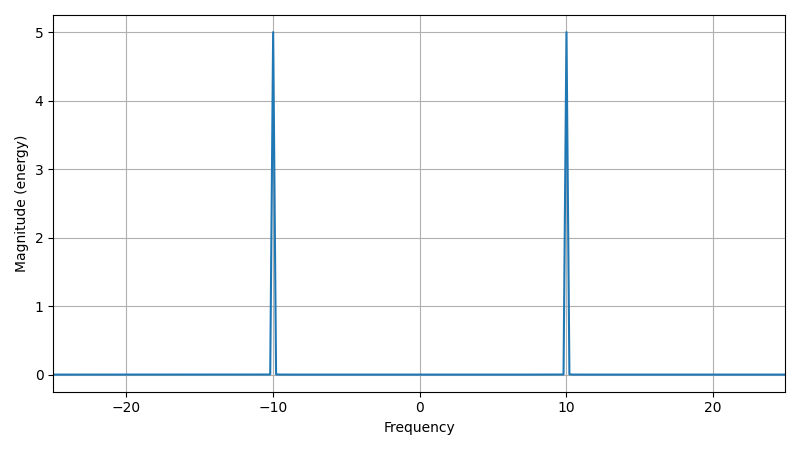

In [4]:
import numpy as np
import matplotlib.pyplot as plt
T = 10
mag = 10
t = np.linspace(0, T, 500, endpoint=False)
x = mag*np.cos(2*pi*10*t)
plt.figure()
plt.magnitude_spectrum(x, Fs=500/T, sides="twosided");

* Note how each spike is half the magnitude of the sinusoid's magnitude.

## Demo: frequency mixing in the frequency domain

Output()

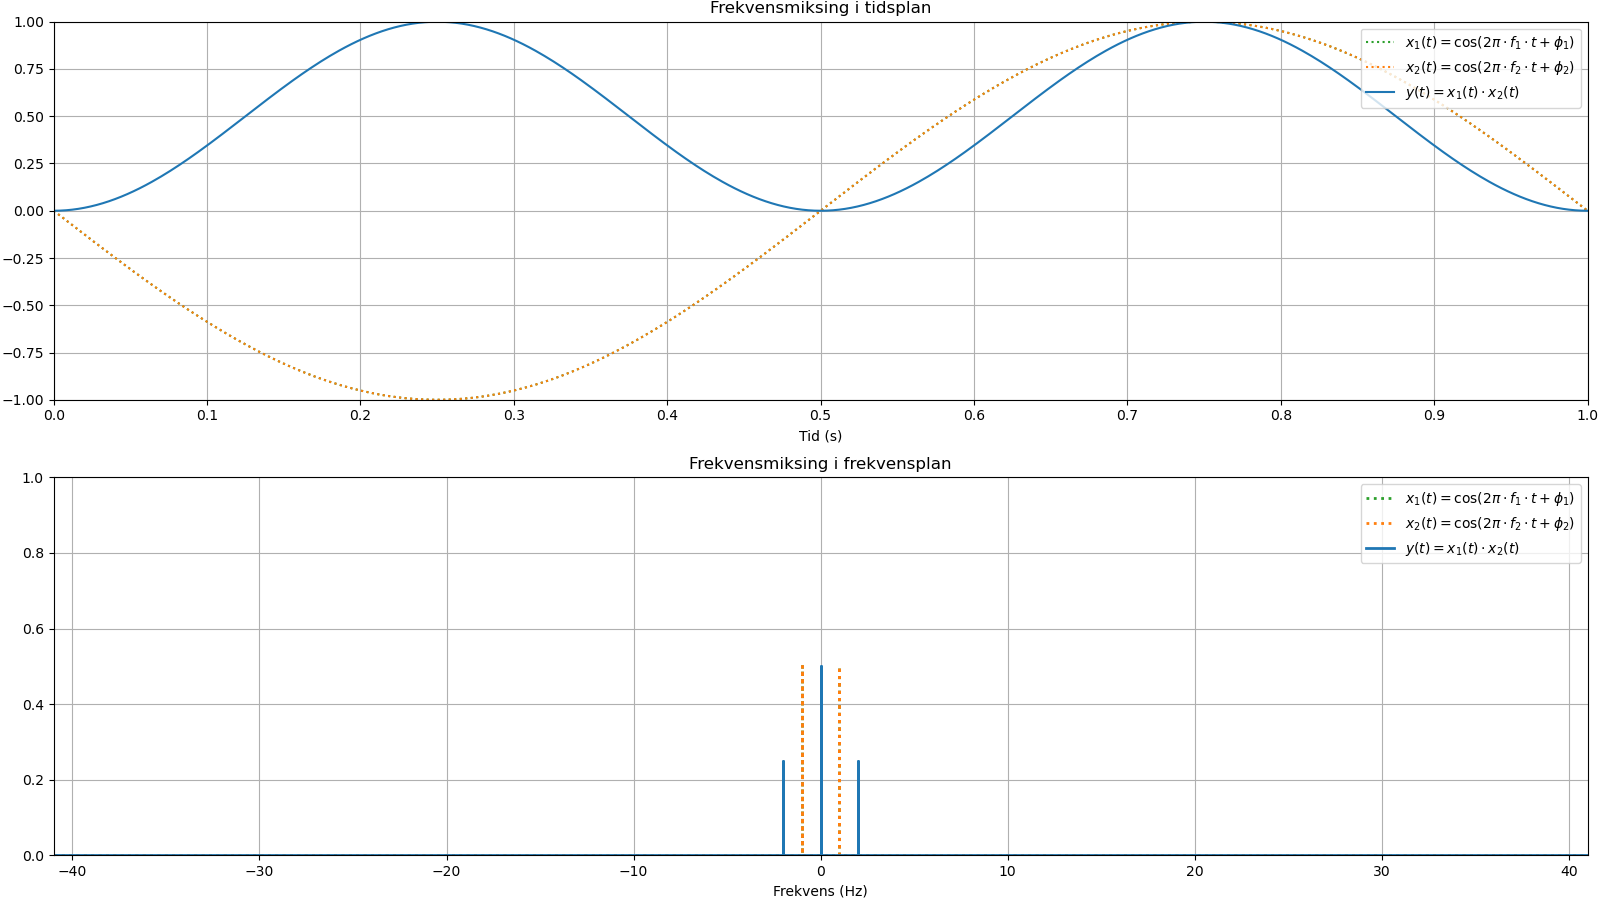

In [34]:
%matplotlib ipympl
from Kildekode._04_Frekvensrepresentasjon import FrequencyMixingDemo
FrequencyMixingDemo(fig_num=2, figsize=(16,9));

## Math example:
* Use **Eulers Formula** to calculate the result of the following complex frequency mixing:
$$2 \cos(100\cdot t) \cdot e^{-j100 \cdot t}$$

# Complex frequency mixing in the frequency domain

* Multiplying **any** signal $x(t)$ by a complex exponential $e^{j2\pi f t}$ produces a *shift* in the entire frequency spectrum of $x(t)$

$$\begin{align}
y(t) &= x(t) \cdot e^{j2\pi f_0 t} \\
&\downarrow \\
Y(f) &= X(f+f_0)
\end{align}$$

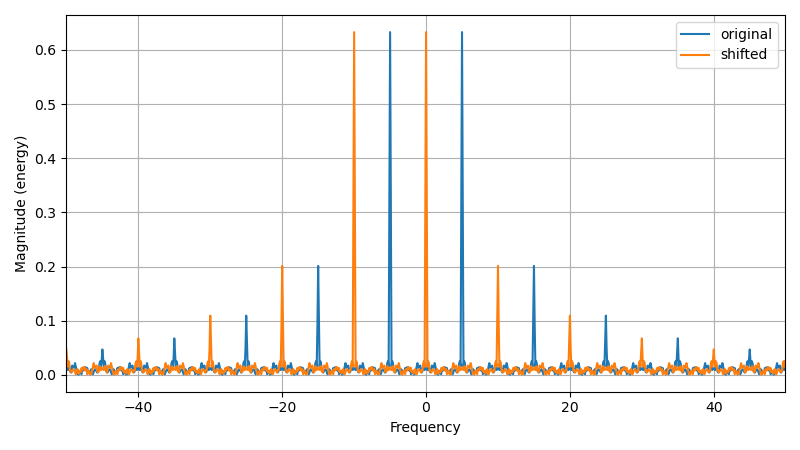

In [39]:
from scipy.signal import square
T = 10
f = 5
f_mixing = -5
t = np.linspace(0, T, 1000, endpoint=False)
x = square(2*np.pi*f*t)
plt.close(10);plt.figure(10)
plt.magnitude_spectrum(x, Fs = 1000/T, sides="twosided", label = "original");
plt.magnitude_spectrum(x*np.exp(2j*pi*f_mixing*t), Fs=1000/T, sides="twosided", label="shifted");
plt.legend(loc="upper right")

## Fourier analysis of signal visualized
![](Figurer/03_Sinussignal/Kompleks_frekvensmiksing.gif)

# Summary of main points:
* Sinusoids are a broad term covering al sinewave-shaped functions
* All signals can be expressed as a sum$^*$ of sinusoids with different frequency, amplitude and phase
* Single frequency components are extracted by *mixing* a signal with the pure tone we wish to identify
    * Need to combine both sine and cosine mixing tones
    * Resulting operation equates mutliplying signal by a complex exponential
* Sinusoids are expressed as the sum of two conter-rotating complex exponentials
    * In the two-sided frequency domain, they have both a *positive* and a *negative* frequency component
* A two-sided frequency spectrum is the "true" representation of the output from the *generalized fourier transform*
    * Not commonly used due to symmetry properties.
    * Essential for analyzing *complex signals*

$^*$For non-repeating signals, the analysis window becomes infinately long, and we get the general fourier tranform. Here, the signal reconstruction is expressed by integratin rather than a sum.

# Questions?